In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
print("Libraries successfully imported! ")

Libraries successfully imported! 


In [3]:
import pandas as pd

df = pd.read_csv(r"C:\Users\hp\Downloads\train (1).csv.csv")


In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)


In [6]:
print("Missing Values Column-wise:")
print(missing_values)

Missing Values Column-wise:
PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
Electrical         1
dtype: int64


In [7]:
df = df.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence'])


In [8]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in num_cols:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].median())

In [9]:
cat_cols = df.select_dtypes(include=['object']).columns

for col in cat_cols:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].mode()[0])

In [10]:
print(df.isnull().sum()[df.isnull().sum() > 0])

Series([], dtype: int64)


In [11]:
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']

df['HouseAge'] = df['YrSold'] - df['YearBuilt']

df[['TotalSF', 'HouseAge']].head()

,TotalSF,HouseAge
0,2566,5
1,2524,31
2,2706,7
3,2473,91
4,3343,8


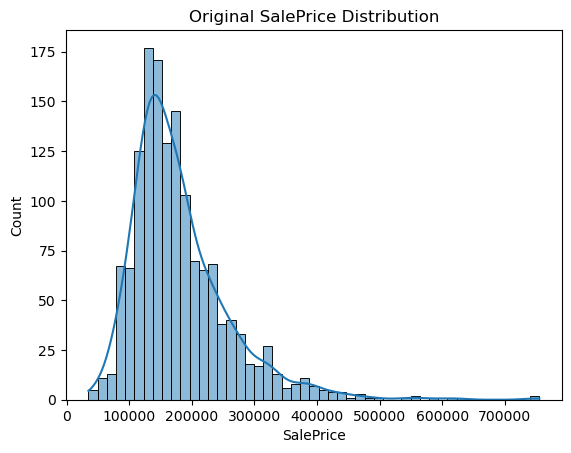

In [12]:
import scipy.stats as stats
sns.histplot(df['SalePrice'], kde=True)
plt.title("Original SalePrice Distribution")
plt.show()


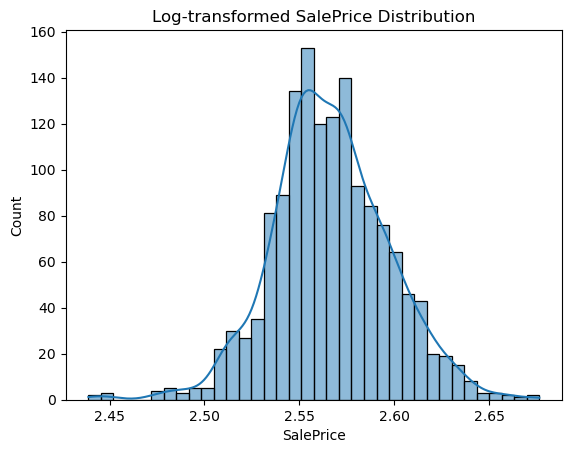

In [14]:
df['SalePrice'] = np.log1p(df['SalePrice'])

sns.histplot(df['SalePrice'], kde=True)
plt.title("Log-transformed SalePrice Distribution")
plt.show()


In [15]:
df_encoded = pd.get_dummies(df, drop_first=True)

print("Final shape after encoding:", df_encoded.shape)

Final shape after encoding: (1460, 239)


In [17]:
correlation = df_encoded.corr()['SalePrice'].sort_values(ascending=False)
print("Top correlated features with SalePrice:")

Top correlated features with SalePrice:


In [18]:
print(correlation.head(10))

SalePrice      1.000000
OverallQual    0.815005
TotalSF        0.773216
GrLivArea      0.697001
GarageCars     0.680156
GarageArea     0.649601
TotalBsmtSF    0.609138
FullBath       0.593950
1stFlrSF       0.593533
YearBuilt      0.587947
Name: SalePrice, dtype: float64


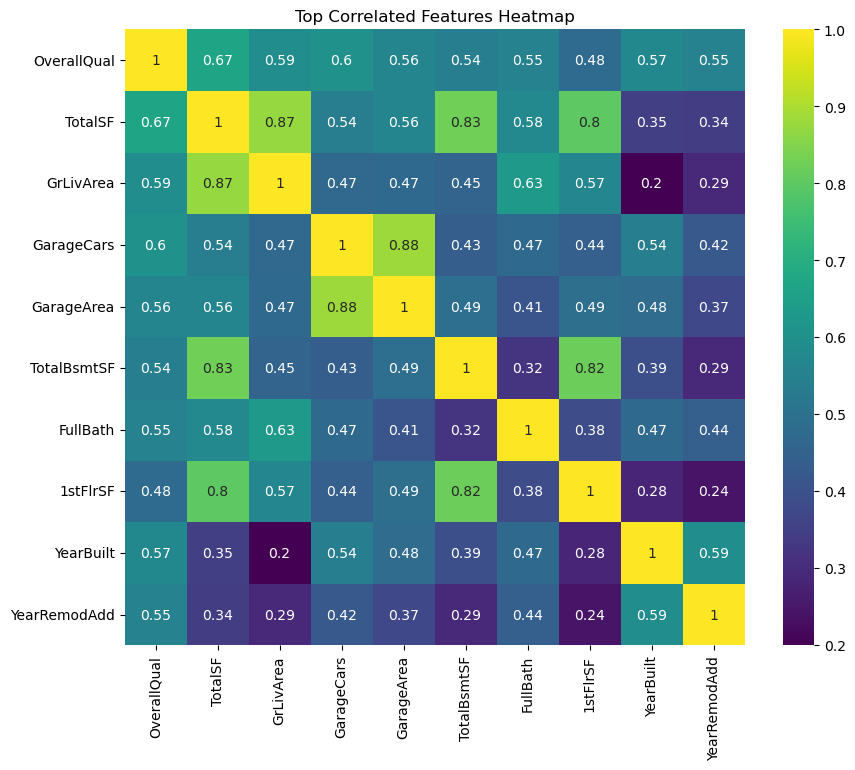

In [19]:
top_features = correlation.index[1:11]  
plt.figure(figsize=(10, 8))
sns.heatmap(df_encoded[top_features].corr(), annot=True, cmap='viridis')
plt.title("Top Correlated Features Heatmap")
plt.show()